Mean Squared Error: 0.99
R-squared: 0.75


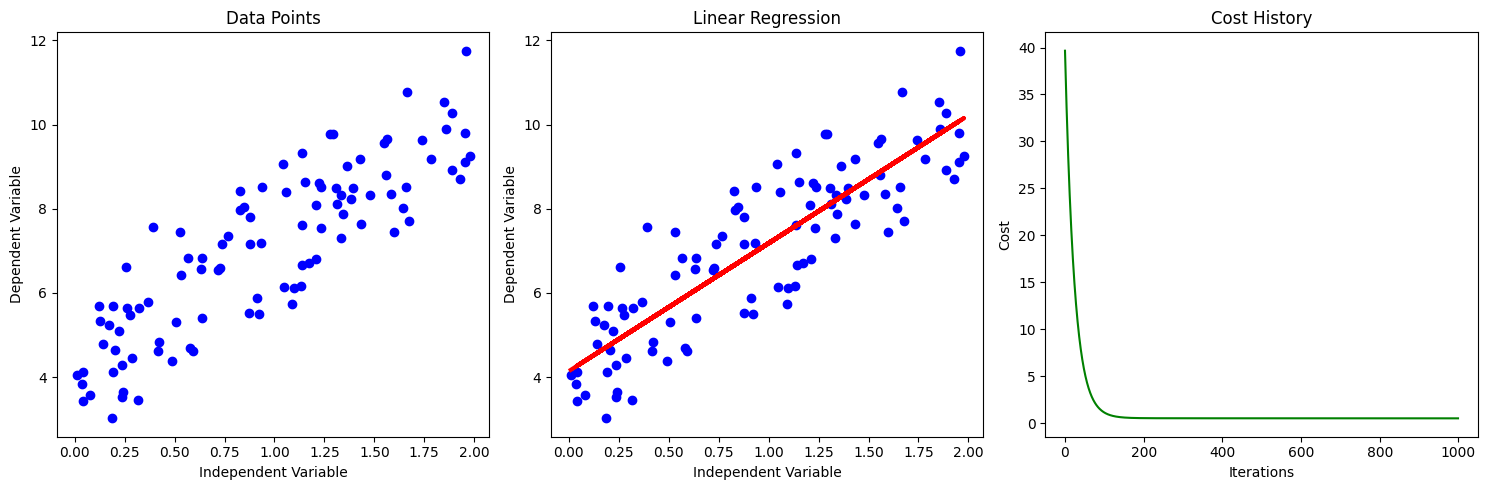

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some sample data for demonstration
np.random.seed(0)
X = 2 * np.random.rand(100, 1)  # Independent variable
y = 4 + 3 * X + np.random.randn(100, 1)  # Dependent variable with some noise

# Define the number of iterations and learning rate for gradient descent
num_iterations = 1000
learning_rate = 0.01

# Initialize the parameters (theta0 and theta1)
theta0 = np.random.randn()
theta1 = np.random.randn()

# Lists to store the cost history for visualization
cost_history = []

# Hypothesis function (linear model)
def hypothesis(theta0, theta1, X):
    return theta0 + theta1 * X

# Cost function (mean squared error)
def cost_function(theta0, theta1, X, y):
    m = len(y)
    h = hypothesis(theta0, theta1, X)
    return (1 / (2 * m)) * np.sum((h - y)**2)

# Gradient Descent function
def gradient_descent(theta0, theta1, X, y, learning_rate, num_iterations):
    m = len(y)
    for i in range(num_iterations):
        h = hypothesis(theta0, theta1, X)
        gradient_theta0 = (1 / m) * np.sum(h - y)
        gradient_theta1 = (1 / m) * np.sum((h - y) * X)
        theta0 -= learning_rate * gradient_theta0
        theta1 -= learning_rate * gradient_theta1
        cost = cost_function(theta0, theta1, X, y)
        cost_history.append(cost)
    return theta0, theta1

# Perform gradient descent to find the optimal parameters
theta0, theta1 = gradient_descent(theta0, theta1, X, y, learning_rate, num_iterations)

# Model evaluation
y_pred = hypothesis(theta0, theta1, X)
mse = np.mean((y_pred - y)**2)
r2 = 1 - (np.sum((y - y_pred)**2) / np.sum((y - np.mean(y))**2))

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

# Plot the data, hypothesis line, and cost history
plt.figure(figsize=(15, 5))

# Plot the data points
plt.subplot(1, 3, 1)
plt.scatter(X, y, color='blue')
plt.xlabel('Independent Variable')
plt.ylabel('Dependent Variable')
plt.title('Data Points')

# Plot the hypothesis line
plt.subplot(1, 3, 2)
plt.scatter(X, y, color='blue')
plt.plot(X, y_pred, color='red', linewidth=3)
plt.xlabel('Independent Variable')
plt.ylabel('Dependent Variable')
plt.title('Linear Regression')

# Plot the cost history
plt.subplot(1, 3, 3)
plt.plot(range(num_iterations), cost_history, color='green')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost History')

plt.tight_layout()
plt.show()